<a href="https://colab.research.google.com/github/among5094/Big-Data-Integrated-Analysis/blob/main/week10_CH09_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D_%EB%82%A0%EC%94%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0/week10_CH09_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D_%EB%82%A0%EC%94%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH09 회귀분석 - 날씨 데이터 예측하기
날짜: 05월 19일 월요일

### 9.1 회귀분석의 개념

In [12]:
from google.colab import drive
drive.mount('/content/Drive/')

Drive already mounted at /content/Drive/; to attempt to forcibly remount, call drive.mount("/content/Drive/", force_remount=True).


In [13]:

import matplotlib as plt
import matplotlib.pyplot as plt
!pip install koreanize-matplotlib
import koreanize_matplotlib

import matplotlib.font_manager as fm
# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=10)
# plt.rc('font', family='NanumBarunGothic')


회귀분석 간단한 실습

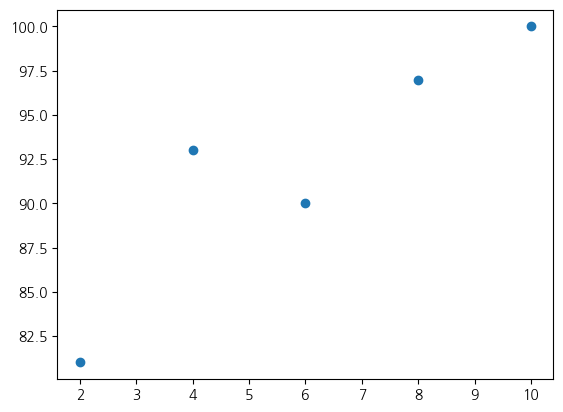

예상점수: [[94.3]]


In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# x(공부 시간 : 독립변수), y(시험 점수 : 종속변수)
x = [[2], [4], [6], [8], [10]]   # 공부 시간
y = [[81], [93], [90], [97], [100]]  # 시험 점수

# 산점도 그래프
plt.scatter(x, y)
plt.show()

# 학습시키기
model = LinearRegression()  # 선형회귀분석 객체 생성하기

# 선형회귀분석 객체를 이용하여 학습시키기
model.fit(x, y)

# 예측하기
result = model.predict([[7]])  # 7시간 학습
print(f'예상점수: {result}')


### 9.2 [회귀분석] 날씨 데이터 예측하기

In [15]:
# '날씨' 파일 읽어오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

seoul = pd.read_excel('/content/Drive/MyDrive/data/(2010-2020) weather.xlsx')
seoul.head()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,108,-7.6,-12.7,-3.6
1,2010-01-02,108,-3.6,-7.4,0.2
2,2010-01-03,108,-6.8,-10.5,-3.2
3,2010-01-04,108,-5.9,-8.0,-3.4
4,2010-01-05,108,-9.9,-12.3,-7.0


In [16]:
# 데이터 전체 구조 출력
seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       4018 non-null   datetime64[ns]
 1   지점       4018 non-null   int64         
 2   평균기온(℃)  4018 non-null   float64       
 3   최저기온(℃)  4018 non-null   float64       
 4   최고기온(℃)  4017 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 157.1 KB


In [17]:
# 요약 통계량 확인
seoul.describe()

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,4018,4018.0,4018.000000,4018.000000,4017.000000
mean,2015-07-02 12:00:00,108.0,12.965207,8.991015,17.699627
min,2010-01-01 00:00:00,108.0,-14.800000,-18.000000,-10.700000
25%,2012-10-01 06:00:00,108.0,3.700000,-0.300000,8.200000
50%,2015-07-02 12:00:00,108.0,14.250000,9.800000,19.600000
75%,2018-04-01 18:00:00,108.0,22.800000,18.900000,27.400000
max,2020-12-31 00:00:00,108.0,33.700000,30.300000,39.600000
std,NaN,0.0,10.803691,10.932678,10.976719


In [20]:
# 지점 명 칼럼 삭제하기
seoul.drop('지점', axis=1, inplace=True)
seoul.head()

,날짜,평균기온(℃),최저기온(℃),최고기온(℃)
0,2010-01-01,-7.6,-12.7,-3.6
1,2010-01-02,-3.6,-7.4,0.2
2,2010-01-03,-6.8,-10.5,-3.2
3,2010-01-04,-5.9,-8.0,-3.4
4,2010-01-05,-9.9,-12.3,-7.0


In [21]:
# 칼럼명 변경하기
seoul.columns = ['날짜', '평균기온', '최저기온', '최고기온']
seoul.columns

Index(['날짜', '평균기온', '최저기온', '최고기온'], dtype='object')

In [22]:
# 결측 데이터 확인 및 처리
seoul.isnull().sum()

,0
날짜,0
평균기온,0
최저기온,0
최고기온,1


In [23]:
seoul.dropna(subset=["최고기온"], axis=0, inplace=True)
seoul.isnull().sum()

,0
날짜,0
평균기온,0
최저기온,0
최고기온,0


In [24]:
# 칼럼 생성
seoul['년도'] = seoul['날짜'].dt.year
seoul.head()

,날짜,평균기온,최저기온,최고기온,년도
0,2010-01-01,-7.6,-12.7,-3.6,2010
1,2010-01-02,-3.6,-7.4,0.2,2010
2,2010-01-03,-6.8,-10.5,-3.2,2010
3,2010-01-04,-5.9,-8.0,-3.4,2010
4,2010-01-05,-9.9,-12.3,-7.0,2010


In [25]:
# 데이터분석에 사용할 데이터 필터링
conditions = (seoul['날짜'].dt.month == 8) & (seoul['날짜'].dt.day == 15)
conditions
seoul0815 = seoul[conditions]
seoul0815

,날짜,평균기온,최저기온,최고기온,년도
226,2010-08-15,26.6,24.6,30.2,2010
591,2011-08-15,24.5,22.9,26.9,2011
957,2012-08-15,23.7,22.4,27.1,2012
1322,2013-08-15,28.7,25.8,32.4,2013
1687,2014-08-15,24.9,20.9,29.6,2014
2052,2015-08-15,27.1,23.1,30.8,2015
2418,2016-08-15,29.1,25.8,34.0,2016
2783,2017-08-15,21.9,20.8,24.0,2017
3148,2018-08-15,31.7,28.3,38.0,2018
3513,2019-08-15,25.9,23.9,28.6,2019


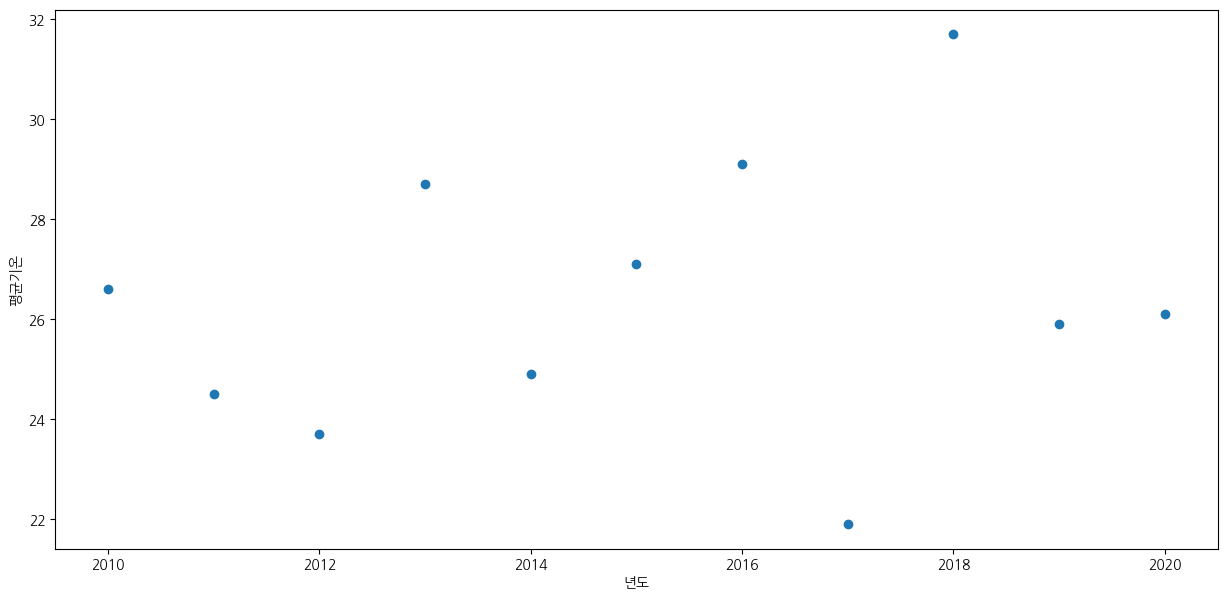

In [26]:
# 데이터 시각화
# 산점도 그래프 그리기
fig = plt.figure(figsize=(15,7))
X = seoul0815['년도']
Y = seoul0815['평균기온']
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.scatter(X, Y)
plt.show()

In [27]:
# 필요한 모듈
from sklearn.linear_model import LinearRegression

##### 단순선형회귀분석

In [28]:
# 2022년 08월 15일 기온 예측하기
model = LinearRegression()
X = seoul0815[['년도']]
Y = seoul0815['평균기온']

model.fit(X, Y) # 학습시키기
result = model.predict([[2022]])  # [27.50818182] 예측된 값
print(result)

[27.50818182]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


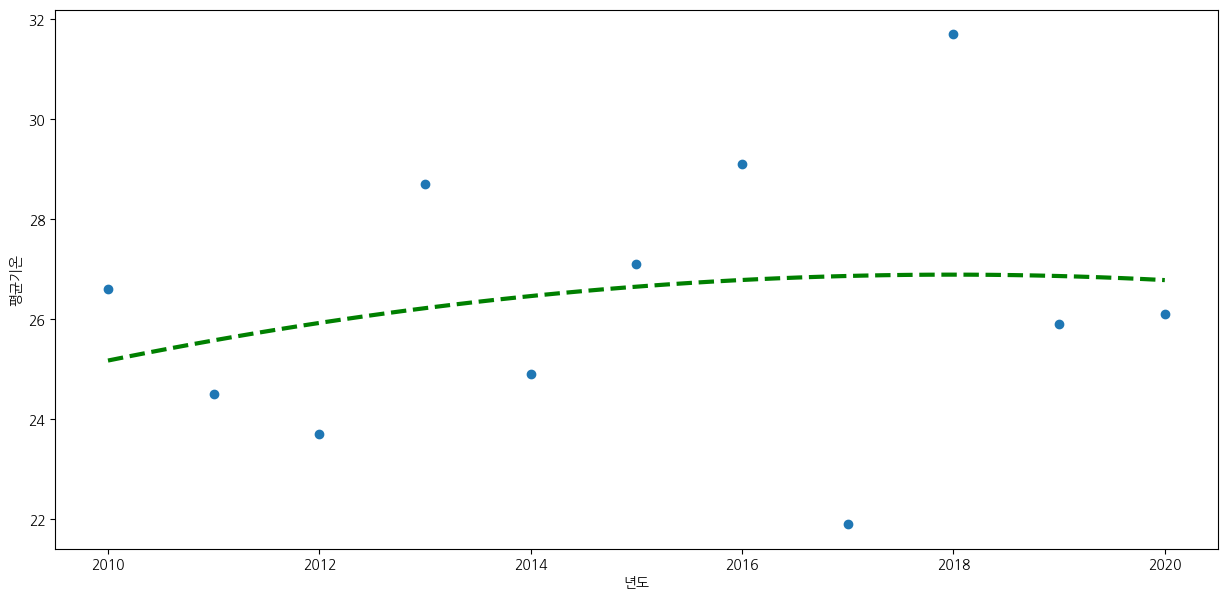

In [29]:
# 08월15일 평균 기온의 산점도, 회귀선 출력하기
x = seoul0815['년도']
y = seoul0815['평균기온']
fp1 = np.polyfit(x, y, 2)
f1 = np.poly1d(fp1)
fx = np.linspace(2010, 2020)

plt.figure(figsize=(15, 7))
plt.scatter(x, y)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('년도')
plt.ylabel('평균기온')
plt.show()


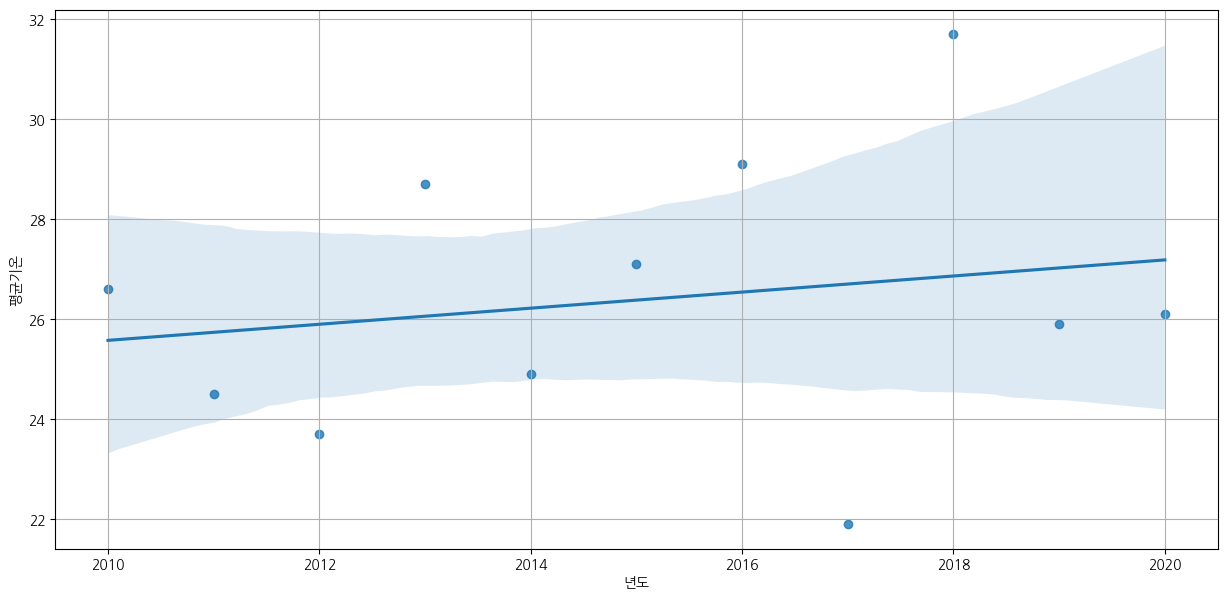

In [30]:
# 시본 모듈로 추세선 넣기
fig = plt.figure(figsize=(15, 7))
sns.regplot(x='년도', y='평균기온', data=seoul0815)
plt.grid()
plt.show()

<Figure size 1500x700 with 0 Axes>

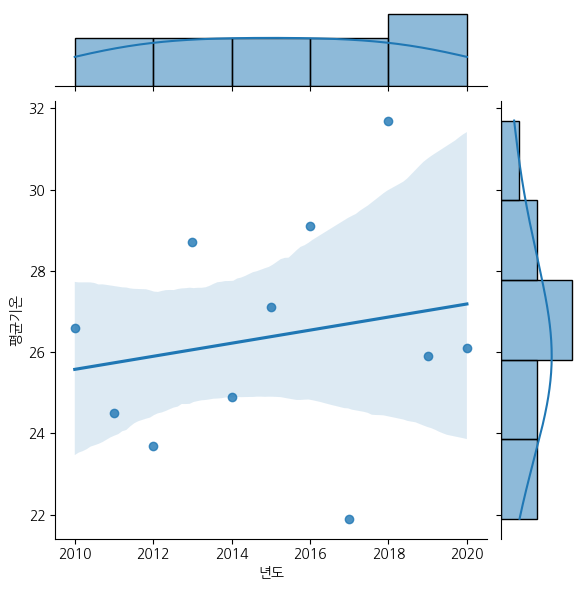

In [31]:
# 산점도와 히스토그램 동시에 그리기
plt.figure(figsize=(15, 7))
sns.jointplot(x='년도', y='평균기온', data=seoul0815, kind='reg')
plt.show()

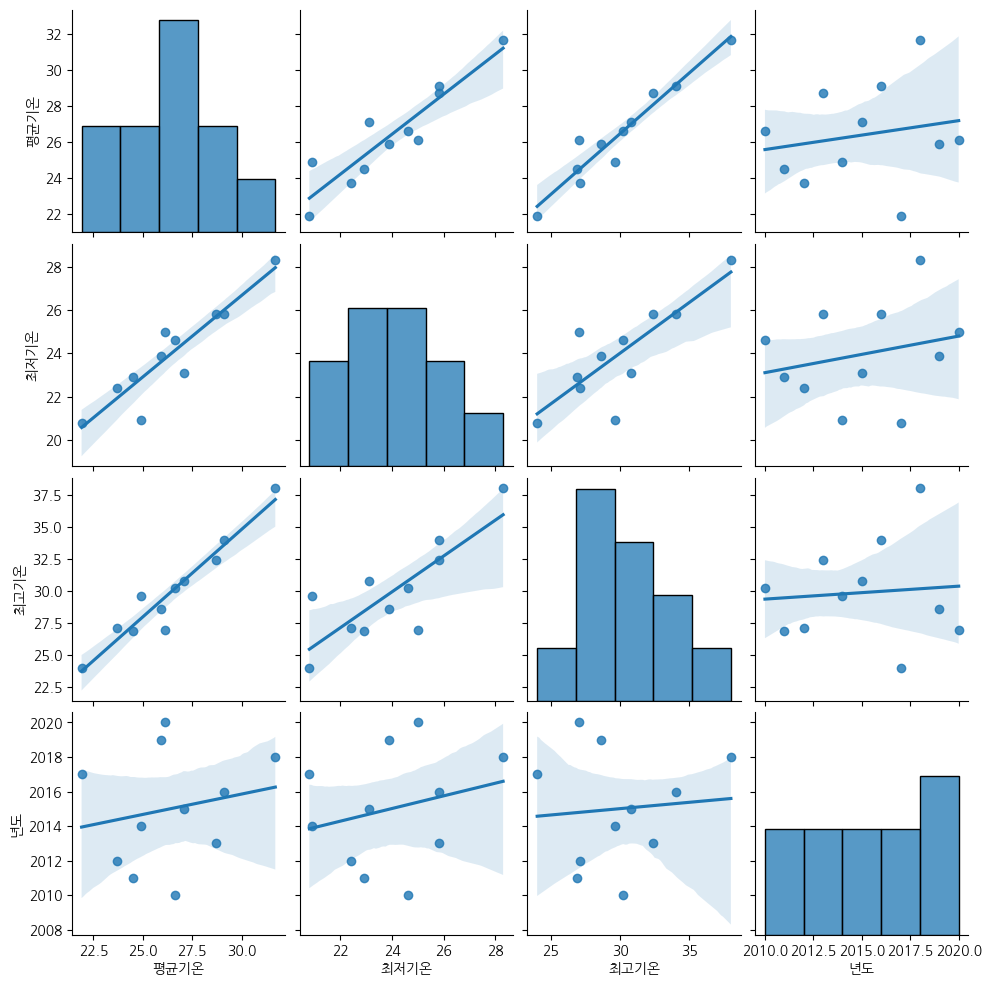

In [32]:
# 산점도와 히스토그램 동시에 그리기
sns.pairplot(seoul0815, kind='reg')
plt.show()

##### 다중선형회귀분석
- 개념: 하나의 종속 변수를 설명하기 위해 2개 이상의 독립 변수를 사용하는 분석 방법

In [33]:
# 2022년 08월 15일 기온 예측하기
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = seoul0815[['년도', '최저기온', '최고기온']]
Y = seoul0815['평균기온']

model.fit(X, Y)
result = model.predict([[2022, 24, 33]])
print(result)  # [28.08381871] -> 평균기온 예측값

[28.08381871]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


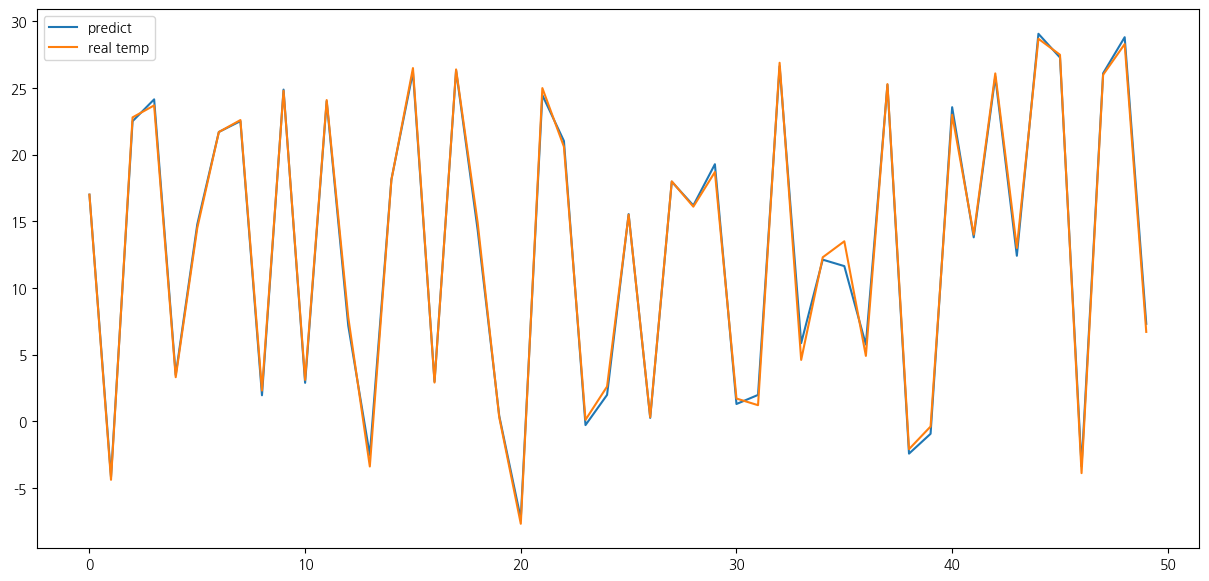

In [34]:
#
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
plt.figure(figsize=(15,7))

# 데이터 준비: 속성(변수) 2가지 선택
X = seoul[['년도', '최저기온', '최고기온']]
Y = seoul['평균기온']

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3)

model = LinearRegression()
model.fit(x_train, y_train)

plt.plot(model.predict(x_test[:50]), label='predict')
plt.plot(y_test[:50].values.reshape(-1, 1), label='real temp')
plt.legend()


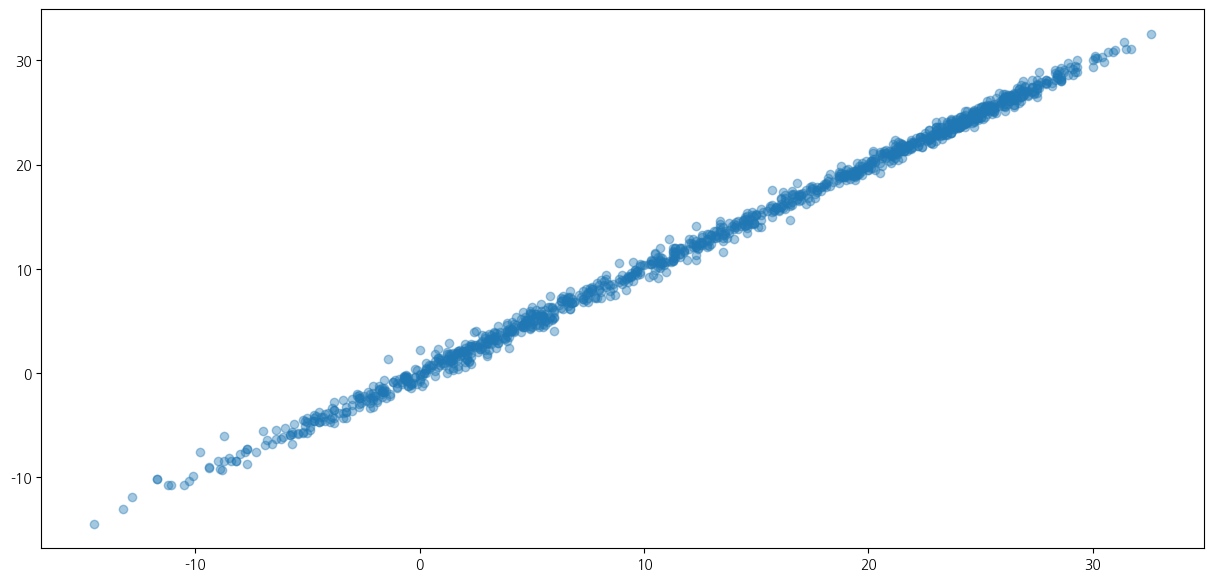

In [35]:
# 다중선형회귀분석: 산점도 그래프 그리기
plt.figure(figsize=(15,7))
y_predict = model.predict(x_test)

plt.scatter(y_test, y_predict, alpha=0.4)
plt.show()

- 우리가 모델링한 다중선형회귀모델은 약 0.99의 결정계수를 가지며, 이는 x 변수들이 y 변수에 미치는 영향이 99%로, x 변수들이 평균 기온값 변동의 99%를 설명할 수 있다는 뜻이다.

In [36]:
print(model.score(x_train, y_train))

0.9978247604671729
